In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

In [3]:
df= pd.read_csv('Distillation Column Dataset.csv')

In [4]:
df.head()

,Time,liquid % in condensor,condensor pressure(kpa),liquid % in reboiler,Mass Flow Rate in Feed Flow (kg/h),Mass Flow rate in top outlet stream (kg/h),Net Mass Flow in main tower,Mole Fraction HX at reboiler,HX Mole Fraction in Top Outler Stream,Feed Mole Fraction,Feed Mole Fraction.1,Feed Tray Temperature,Main Tower Pressure,Bottom Tower Pressure,Top Tower Pressure,Reflux Ratio,Duties Summary,MoleFractionTX,MoleFractionHX
0,0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,0.501001,0.498999,76.803959,104.148959,110.216959,67.038059,0.798463,0,0.966281,0.033719
1,30,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,0.501001,0.498999,76.437645,103.977045,110.045045,66.866145,0.800811,0,0.965788,0.034212
2,60,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,0.501001,0.498999,77.041465,104.608865,110.676865,67.497965,0.803544,0,0.965758,0.034242
3,90,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,0.501001,0.498999,77.016096,104.609296,110.677296,67.498396,0.807065,0,0.965756,0.034244
4,120,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,0.501001,0.498999,77.252293,104.864693,110.932693,67.753793,0.811774,0,0.965784,0.034216


In [6]:
df.isna().sum()  #Have to check is there any "NAN"

Time                                           0
liquid % in condensor                          0
condensor pressure(kpa)                        0
liquid % in reboiler                           0
Mass Flow Rate in Feed Flow  (kg/h)            0
Mass Flow rate in top outlet stream  (kg/h)    0
Net Mass Flow in main tower                    0
Mole Fraction HX at reboiler                   0
HX Mole Fraction in Top Outler Stream          0
Feed Mole Fraction                             0
Feed Mole Fraction.1                           0
Feed Tray Temperature                          0
Main Tower Pressure                            0
Bottom Tower Pressure                          0
Top Tower Pressure                             0
Reflux Ratio                                   0
Duties Summary                                 0
MoleFractionTX                                 0
MoleFractionHX                                 0
dtype: int64

In [7]:
## Check is there any column with same value in all rows

for col in df.columns:
    if len(df[col].unique()) == 1:
        print( {col} )

{'Feed Mole Fraction'}
{'Feed Mole Fraction.1'}
{'Duties Summary'}


In [8]:
# So these data are not useful I think, Feed mole concentration is constant during the operation. The Duties Summary is "0". Mostly duty summary is a report about the distillation column efficiency and maintenance details etc.

In [9]:
df=df.drop(['Feed Mole Fraction'], axis=1)
df=df.drop(['Feed Mole Fraction.1'], axis=1)
df=df.drop(["Duties Summary"], axis=1)
df.head()

,Time,liquid % in condensor,condensor pressure(kpa),liquid % in reboiler,Mass Flow Rate in Feed Flow (kg/h),Mass Flow rate in top outlet stream (kg/h),Net Mass Flow in main tower,Mole Fraction HX at reboiler,HX Mole Fraction in Top Outler Stream,Feed Tray Temperature,Main Tower Pressure,Bottom Tower Pressure,Top Tower Pressure,Reflux Ratio,MoleFractionTX,MoleFractionHX
0,0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,76.803959,104.148959,110.216959,67.038059,0.798463,0.966281,0.033719
1,30,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,76.437645,103.977045,110.045045,66.866145,0.800811,0.965788,0.034212
2,60,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,77.041465,104.608865,110.676865,67.497965,0.803544,0.965758,0.034242
3,90,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,77.016096,104.609296,110.677296,67.498396,0.807065,0.965756,0.034244
4,120,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,77.252293,104.864693,110.932693,67.753793,0.811774,0.965784,0.034216


In [10]:
# Correlation must be checked

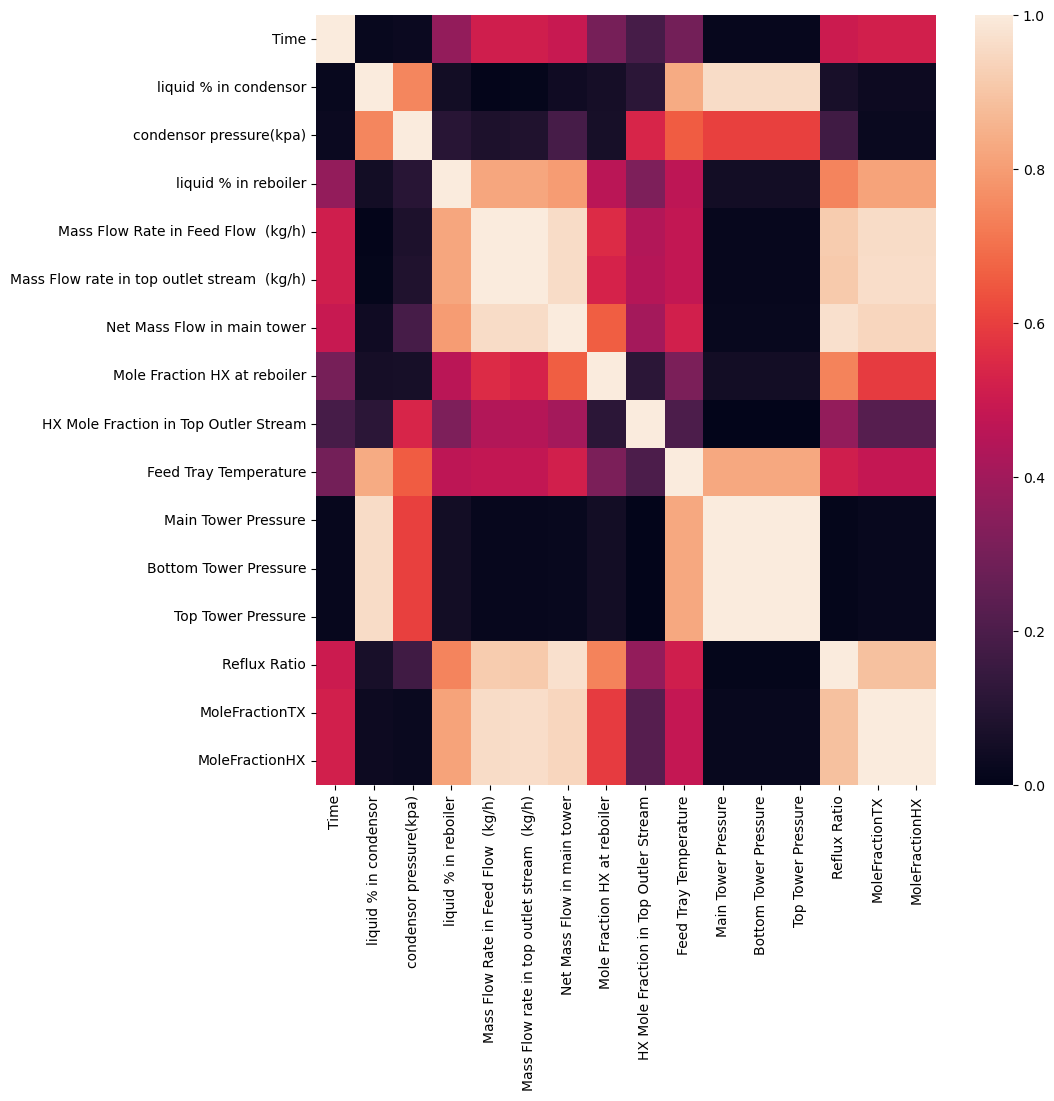

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
#sns.color_palette("magma", as_cmap=True)
sns.heatmap(abs(df.corr()),vmin=0, vmax=1)
plt.show()

In [16]:
df.corr()   

,Time,liquid % in condensor,condensor pressure(kpa),liquid % in reboiler,Mass Flow Rate in Feed Flow (kg/h),Mass Flow rate in top outlet stream (kg/h),Net Mass Flow in main tower,Mole Fraction HX at reboiler,HX Mole Fraction in Top Outler Stream,Feed Tray Temperature,Main Tower Pressure,Bottom Tower Pressure,Top Tower Pressure,Reflux Ratio,MoleFractionTX,MoleFractionHX
Time,1.000000,-0.019574,-0.029011,-0.368683,-0.513477,-0.512541,-0.492081,0.302717,-0.187222,-0.294419,-0.018131,-0.018131,-0.018131,0.500055,0.516353,-0.516352
liquid % in condensor,-0.019574,1.000000,0.746864,0.050232,-0.007076,-0.010455,0.042869,-0.056226,0.114151,0.833498,0.958142,0.958142,0.958142,-0.065869,0.031536,-0.031535
condensor pressure(kpa),-0.029011,0.746864,1.000000,0.105490,0.076542,0.084225,0.186376,0.058721,0.535252,0.659595,0.603224,0.603224,0.603224,-0.170118,0.026545,-0.026544
liquid % in reboiler,-0.368683,0.050232,0.105490,1.000000,0.822167,0.823246,0.799410,-0.460723,0.317811,0.465501,0.048020,0.048020,0.048020,-0.745673,-0.815105,0.815104
Mass Flow Rate in Feed Flow (kg/h),-0.513477,-0.007076,0.076542,0.822167,1.000000,0.998642,0.959892,-0.552521,0.441386,0.479340,-0.017119,-0.017119,-0.017119,-0.916069,-0.959240,0.959240
Mass Flow rate in top outlet stream (kg/h),-0.512541,-0.010455,0.084225,0.823246,0.998642,1.000000,0.959797,-0.529631,0.448470,0.480445,-0.018120,-0.018120,-0.018120,-0.911593,-0.961166,0.961166
Net Mass Flow in main tower,-0.492081,0.042869,0.186376,0.799410,0.959892,0.959797,1.000000,-0.662790,0.409924,0.518584,-0.020238,-0.020238,-0.020238,-0.969132,-0.941967,0.941967
Mole Fraction HX at reboiler,0.302717,-0.056226,0.058721,-0.460723,-0.552521,-0.529631,-0.662790,1.000000,0.117106,-0.313934,0.049303,0.049303,0.049303,0.738440,0.590367,-0.590366
HX Mole Fraction in Top Outler Stream,-0.187222,0.114151,0.535252,0.317811,0.441386,0.448470,0.409924,0.117106,1.000000,0.202800,-0.002392,-0.002392,-0.002392,-0.369369,-0.226468,0.226469
Feed Tray Temperature,-0.294419,0.833498,0.659595,0.465501,0.479340,0.480445,0.518584,-0.313934,0.202800,1.000000,0.824889,0.824889,0.824889,-0.513030,-0.481795,0.481795


In [18]:
 #Since it is a binary distillation data we need only one mole fraction data. I take TX for the training and testing. But not without a testing. If the sum of HX and TX is 1 for all rows we can remove one of them

In [19]:
df["tot"]=df["MoleFractionTX"]+df["MoleFractionHX"]
df['tot'].all() == 1

True

In [20]:
# Here it shows that every rows returned a 1 as total of mole fractions. It handpicked some of the columns for the further operation by checking Correlation map.

In [23]:
# by cheching correlation we conclude that some of the features are not important for our model training so we remove them

In [22]:
Column=df[["Time","liquid % in reboiler","Mass Flow Rate in Feed Flow  (kg/h)","Mass Flow rate in top outlet stream  (kg/h)","Net Mass Flow in main tower","HX Mole Fraction in Top Outler Stream","Feed Tray Temperature","Reflux Ratio","MoleFractionTX"]]
Column

,Time,liquid % in reboiler,Mass Flow Rate in Feed Flow (kg/h),Mass Flow rate in top outlet stream (kg/h),Net Mass Flow in main tower,HX Mole Fraction in Top Outler Stream,Feed Tray Temperature,Reflux Ratio,MoleFractionTX
0,0,49.718959,3693.858959,6695.368959,2924.818959,0.054394,76.803959,0.798463,0.966281
1,30,49.541545,3712.947045,6629.637045,2767.487045,0.054233,76.437645,0.800811,0.965788
2,60,50.145165,3718.008865,6692.598865,2763.018865,0.053941,77.041465,0.803544,0.965758
3,90,50.142796,3721.819296,6702.869296,2754.009296,0.053968,77.016096,0.807065,0.965756
4,120,50.406093,3724.444693,6710.444693,2744.244693,0.054121,77.252293,0.811774,0.965784
...,...,...,...,...,...,...,...,...,...
956,28680,54.520579,3783.434579,6808.374579,2782.764579,0.054906,76.467579,0.792092,0.964851
957,28710,55.073908,3783.905308,6809.155308,2782.875308,0.054913,77.028608,0.792288,0.964852
958,28740,55.234278,3784.033378,6809.343378,2783.673378,0.054925,77.196878,0.792515,0.964853
959,28770,54.974485,3783.671285,6808.931285,2782.991285,0.054930,76.944985,0.792525,0.964853


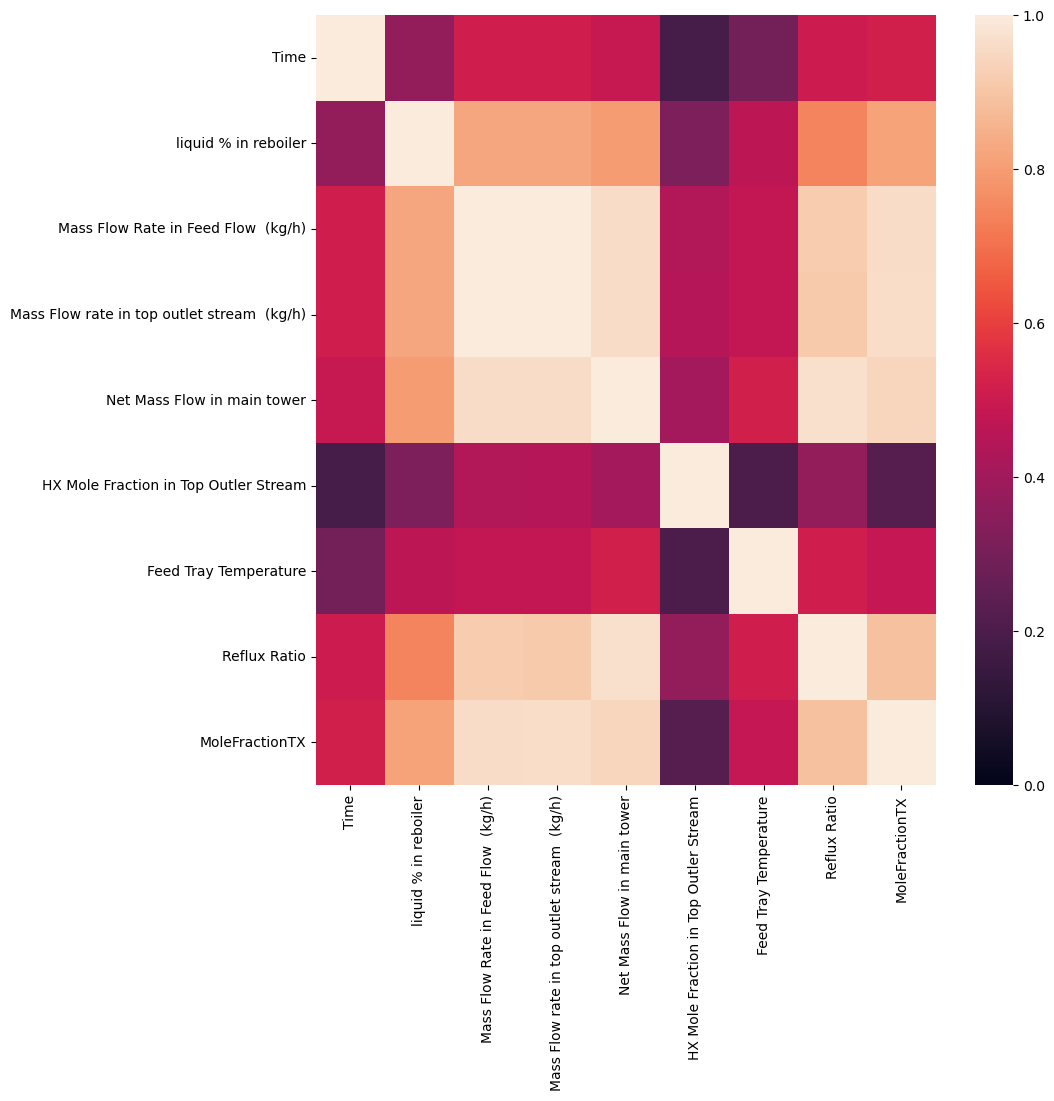

In [24]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(abs(Column.corr()),vmin=0, vmax=1)
plt.show()

In [25]:
x = Column.iloc[:,0:8]
y = Column[["MoleFractionTX"]]
x

,Time,liquid % in reboiler,Mass Flow Rate in Feed Flow (kg/h),Mass Flow rate in top outlet stream (kg/h),Net Mass Flow in main tower,HX Mole Fraction in Top Outler Stream,Feed Tray Temperature,Reflux Ratio
0,0,49.718959,3693.858959,6695.368959,2924.818959,0.054394,76.803959,0.798463
1,30,49.541545,3712.947045,6629.637045,2767.487045,0.054233,76.437645,0.800811
2,60,50.145165,3718.008865,6692.598865,2763.018865,0.053941,77.041465,0.803544
3,90,50.142796,3721.819296,6702.869296,2754.009296,0.053968,77.016096,0.807065
4,120,50.406093,3724.444693,6710.444693,2744.244693,0.054121,77.252293,0.811774
...,...,...,...,...,...,...,...,...
956,28680,54.520579,3783.434579,6808.374579,2782.764579,0.054906,76.467579,0.792092
957,28710,55.073908,3783.905308,6809.155308,2782.875308,0.054913,77.028608,0.792288
958,28740,55.234278,3784.033378,6809.343378,2783.673378,0.054925,77.196878,0.792515
959,28770,54.974485,3783.671285,6808.931285,2782.991285,0.054930,76.944985,0.792525


In [26]:
Column['Time'] = MinMaxScaler().fit_transform(np.array(Column['Time']).reshape(-1,1))

C:\Users\rahul\AppData\Local\Temp\ipykernel_27140\2788715829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Column['Time'] = MinMaxScaler().fit_transform(np.array(Column['Time']).reshape(-1,1))


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 1) 
regressor.fit(x_train,y_train)


DecisionTreeRegressor(random_state=1)

In [31]:
y_pred=regressor.predict(x_test)
y_pred

array([0.951791, 0.951782, 0.951789, 0.97689 , 0.952335, 0.971222,
       0.958302, 0.951782, 0.965916, 0.952174, 0.964903, 0.965923,
       0.958301, 0.96486 , 0.971109, 0.951865, 0.965921, 0.951783,
       0.976989, 0.977168, 0.971223, 0.966055, 0.97596 , 0.977169,
       0.965151, 0.965974, 0.958284, 0.954018, 0.951782, 0.965924,
       0.970601, 0.965907, 0.97596 , 0.95879 , 0.967057, 0.964854,
       0.975274, 0.965933, 0.958573, 0.971212, 0.970493, 0.965932,
       0.971217, 0.971218, 0.958843, 0.964869, 0.951781, 0.95979 ,
       0.951784, 0.951783, 0.951784, 0.958623, 0.960299, 0.951927,
       0.951783, 0.977095, 0.95979 , 0.971224, 0.951963, 0.965923,
       0.953431, 0.958278, 0.971155, 0.958522, 0.951782, 0.970131,
       0.965932, 0.977054, 0.971222, 0.971099, 0.977067, 0.97122 ,
       0.977033, 0.951781, 0.971224, 0.951782, 0.965912, 0.964878,
       0.958299, 0.952597, 0.951803, 0.967057, 0.96382 , 0.971213,
       0.971172, 0.965889, 0.971224, 0.971218, 0.96591 , 0.951

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9921837764637764

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [35]:
r2_score(y_test, y_pred)

0.9921837764637764